In [124]:
#loading libraries 
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.metrics import classification_report
import seaborn as sns

In [125]:
path = r"C:\Users\abbsi\OneDrive\Bureau\python project\output.csv"
col_names=['number','Sex','%RedPixel',"%GreenPixel",'%BluePixel','Hb','Anaemic']
anemia = pd.read_csv(path, header=None, names=col_names)
anemia = anemia.drop([0],axis=0)
anemia = anemia.drop(['number','Sex'],axis=1)
anemia.head()

,%RedPixel,%GreenPixel,%BluePixel,Hb,Anaemic
1,43.2555,30.8421,25.9025,6.3,Yes
2,45.6033,28.19,26.2067,13.5,No
3,45.0107,28.9677,26.0215,11.7,No
4,44.5398,28.9899,26.4703,13.5,No
5,43.287,30.6972,26.0158,12.4,No


In [126]:
anemia.shape

(104, 5)

In [128]:
anemia.describe

<bound method NDFrame.describe of      %RedPixel  %GreenPixel  %BluePixel    Hb  Anaemic
1      43.2555      30.8421     43.2555   6.3        1
2      45.6033      28.1900     45.6033  13.5        0
3      45.0107      28.9677     45.0107  11.7        0
4      44.5398      28.9899     44.5398  13.5        0
5      43.2870      30.6972     43.2870  12.4        0
..         ...          ...         ...   ...      ...
100    49.9999      29.2860     49.9999  14.5        1
101    42.2324      30.6757     42.2324   6.3        1
102    45.6064      31.9084     45.6064  12.7        0
103    45.2095      29.2769     45.2095  13.4        0
104    43.5706      29.8094     43.5706  12.2        0

[104 rows x 5 columns]>

In [127]:
anemia['%RedPixel'] = anemia['%RedPixel'].astype(float)
anemia['%GreenPixel'] = anemia['%GreenPixel'].astype(float)
anemia['%BluePixel'] = anemia['%RedPixel'].astype(float)
anemia['Hb'] = anemia['Hb'].astype(float)
anemia.Anaemic = [1 if value == 'Yes' else 0 for value in anemia.Anaemic]


In [131]:
anemia.dtypes

%RedPixel       float64
%GreenPixel     float64
%BluePixel      float64
Hb              float64
Anaemic        category
dtype: object

<Axes: >

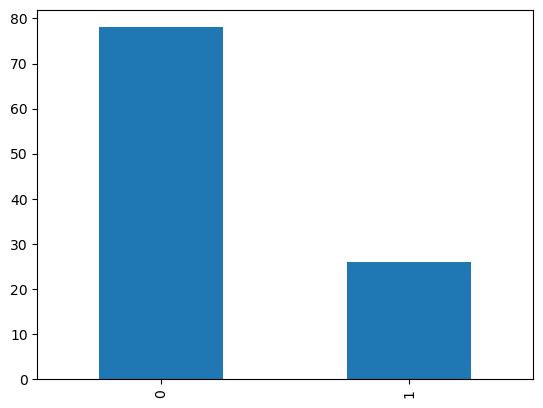

In [132]:
anemia['Anaemic'] = anemia['Anaemic'].astype('category', copy=False)
anemia['Anaemic'].value_counts().plot(kind="bar")

In [133]:
x = anemia.drop(["Anaemic"],axis=1)
y = anemia["Anaemic"]

In [134]:
#normalazing the data 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x

,%RedPixel,%GreenPixel,%BluePixel,Hb
1,43.2555,30.8421,43.2555,6.3
2,45.6033,28.1900,45.6033,13.5
3,45.0107,28.9677,45.0107,11.7
4,44.5398,28.9899,44.5398,13.5
5,43.2870,30.6972,43.2870,12.4
...,...,...,...,...
100,49.9999,29.2860,49.9999,14.5
101,42.2324,30.6757,42.2324,6.3
102,45.6064,31.9084,45.6064,12.7
103,45.2095,29.2769,45.2095,13.4


In [135]:
x_train , x_test , y_train , y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=42)

In [136]:
lr = LogisticRegression()

#train the model on the training data
lr.fit(x_train, y_train)

#predict the target variable on test data
y_pred = lr.predict(x_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy : {accuracy: .2f}")

accuracy :  0.94


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.71      0.83         7

    accuracy                           0.94        32
   macro avg       0.96      0.86      0.90        32
weighted avg       0.94      0.94      0.93        32

